In [1]:
print("Hello Wonderful Person")

Hello Wonderful Person


In [3]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');

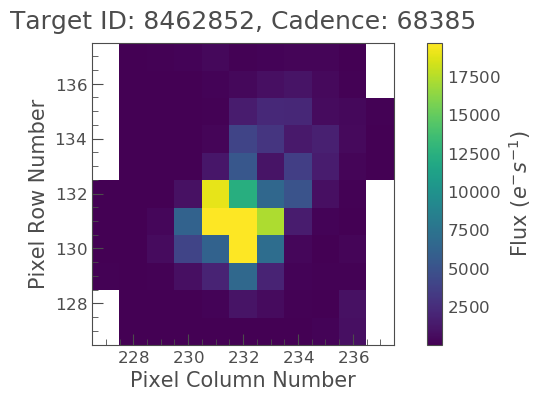

In [6]:
pixelfile.plot(frame=1000);

In [7]:
lc = pixelfile.to_lightcurve(aperture_mask='all');

In [9]:
lc.time, lc.flux

(array([1472.11777934, 1472.13821223, 1472.15864492, ..., 1557.89718798,
        1557.9380561 , 1557.95849016]),
 array([258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
        258865.6 ], dtype=float32))

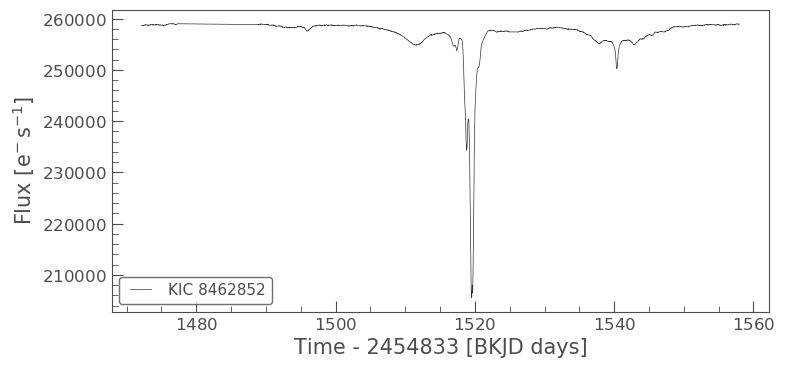

In [10]:
lc.plot();

In [11]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()

In [14]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

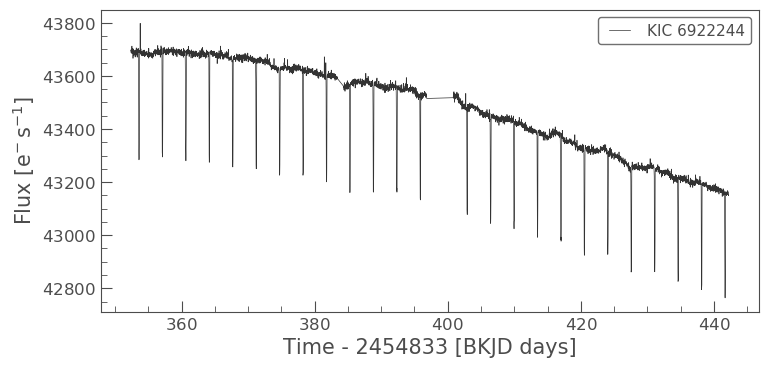

In [15]:
lc.plot();

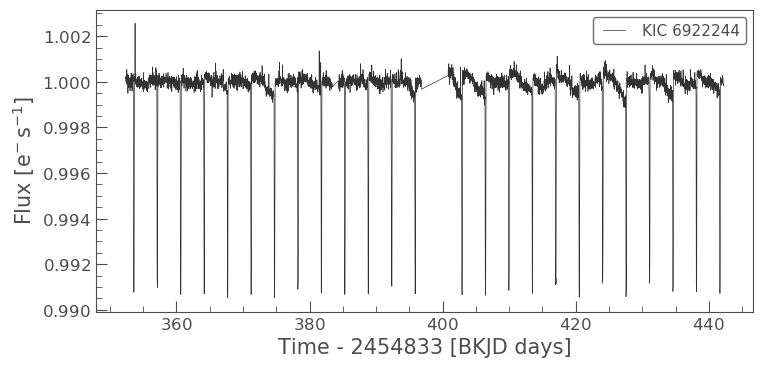

In [16]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

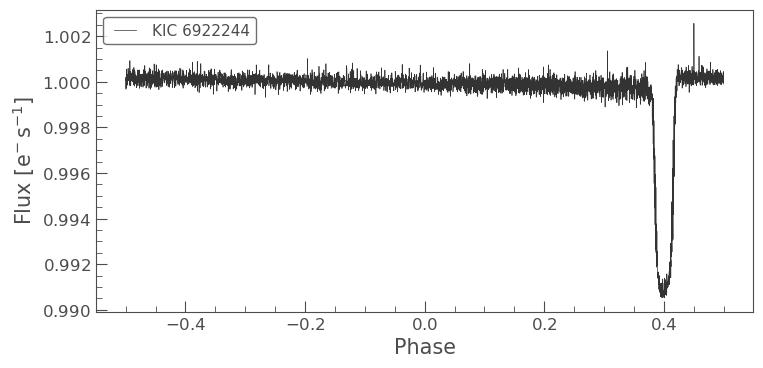

In [27]:
folded_lc = flat_lc.fold(period=3.522)
folded_lc.plot();

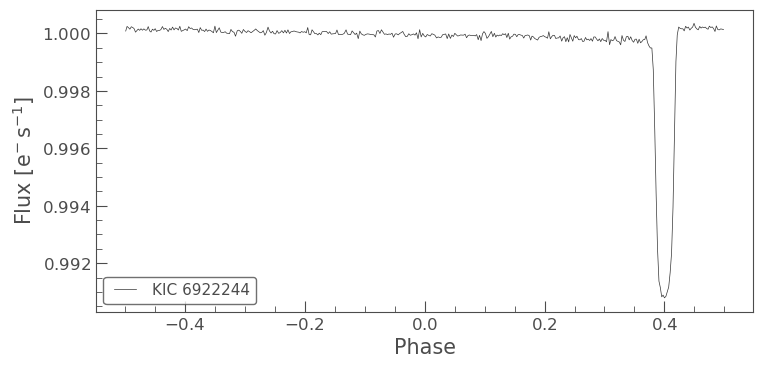

In [28]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

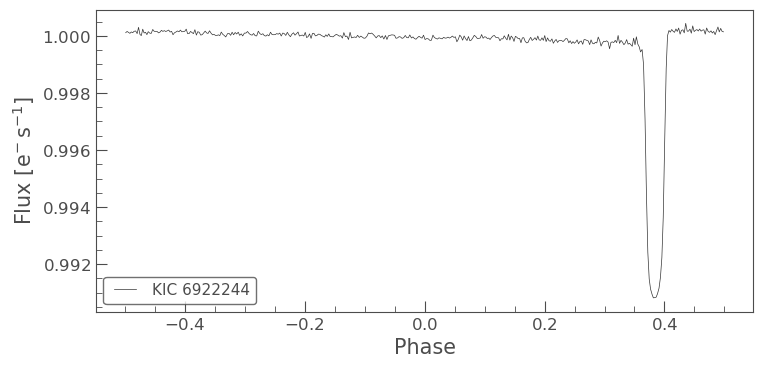

In [29]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

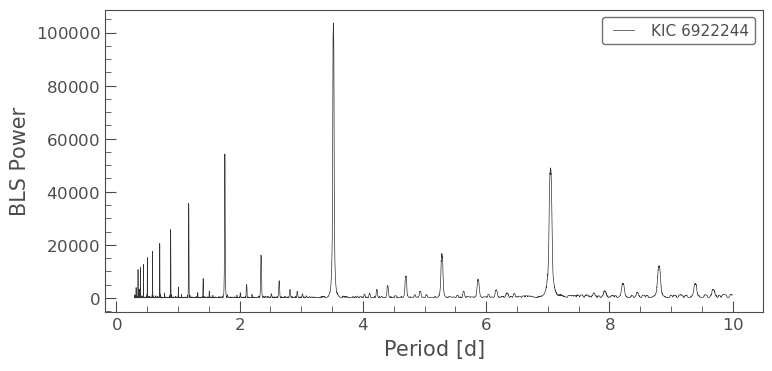

In [24]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.3, 10, 0.001))
periodogram.plot();

In [26]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 3.52200 d


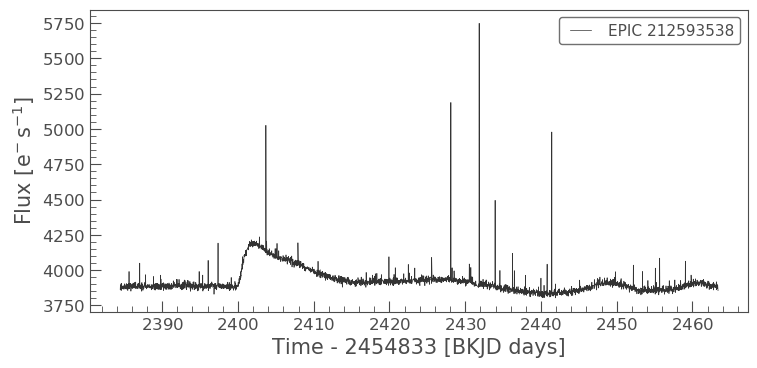

In [35]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot();

In [132]:
from lightkurve import search_targetpixelfile
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

In [133]:
tpf.mission
tpf.targetid 

261136679

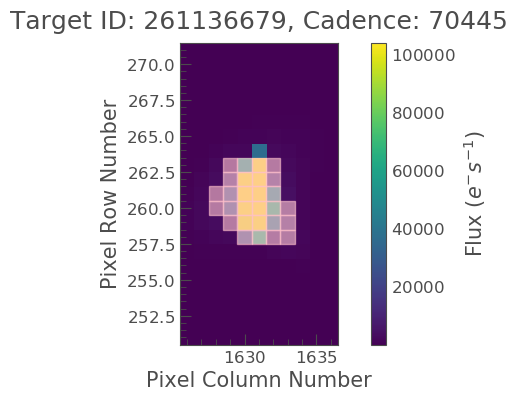

In [86]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

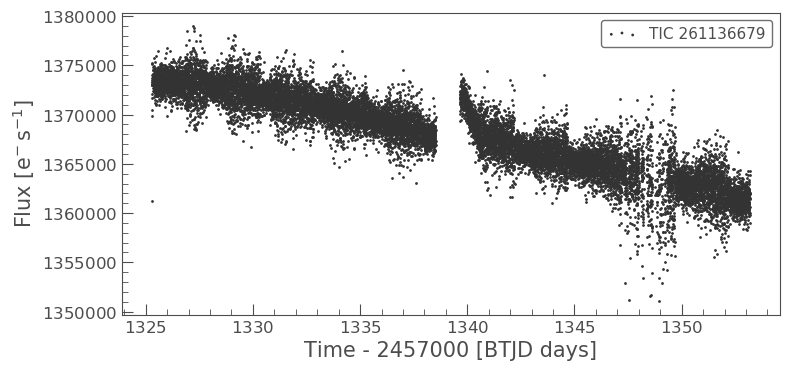

In [129]:
lc = tpf.to_lightcurve()
lc.scatter();

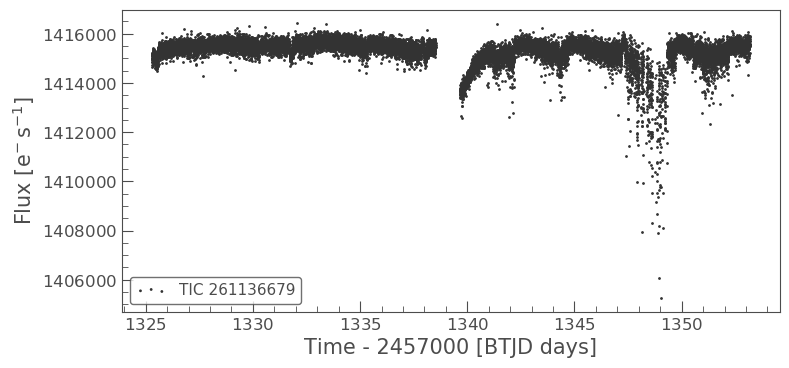

In [89]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter();

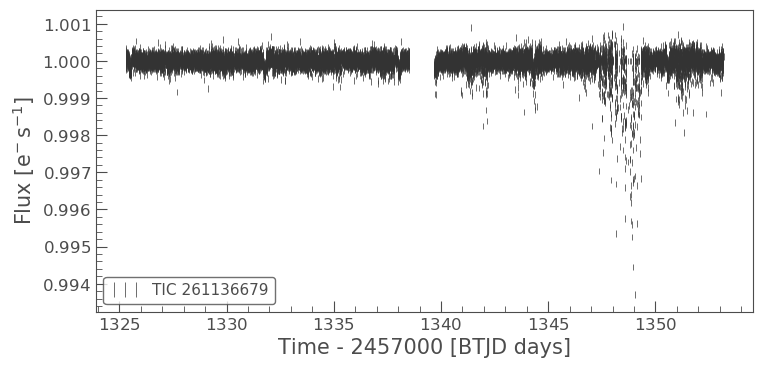

In [90]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

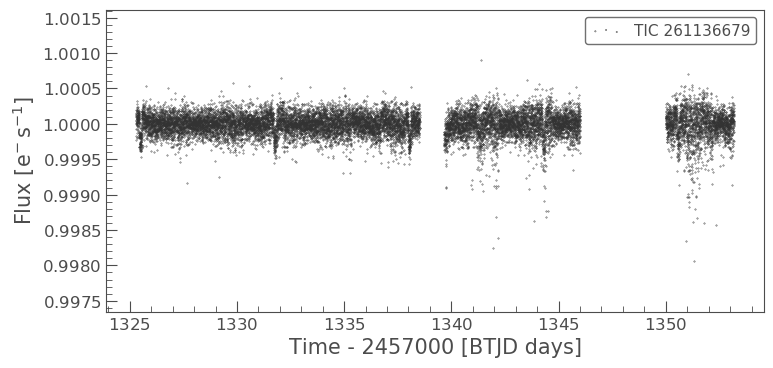

In [94]:
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1);

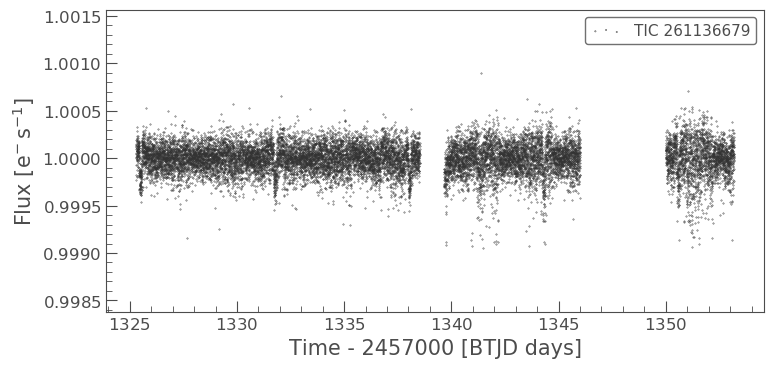

In [99]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1);

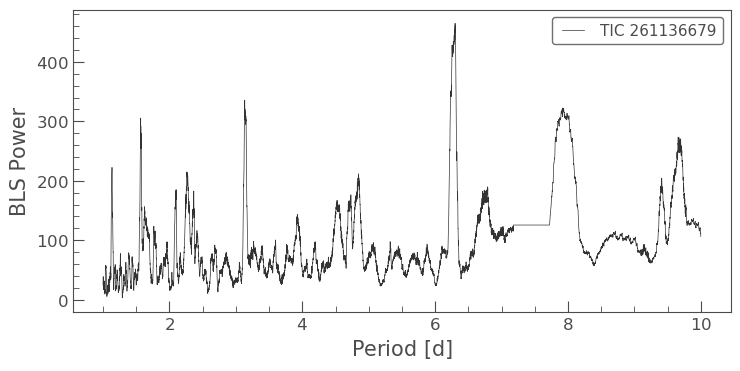

In [101]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot();

In [102]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 6.300 d


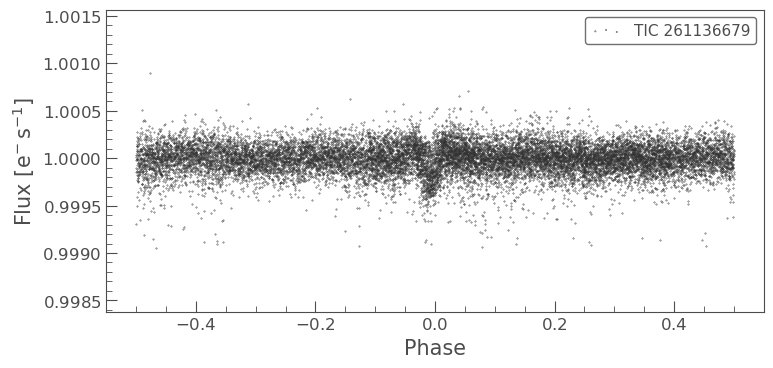

In [121]:
folded_lc = clipped_lc.fold(period=6.300, t0=1325.504)
folded_lc.scatter(s=0.1);

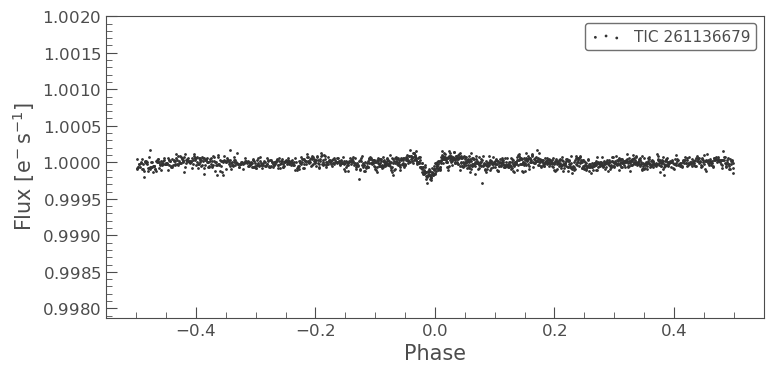

In [122]:
binned_lc = folded_lc.bin(binsize=10) 
binned_lc.scatter();

In [136]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
tpf = TessTargetPixelFile("/home/anton/Documents/Jupyter/tess2018234235059-s0002-0000000419012256-0121-s_tp.fits")
tpf

TessTargetPixelFile(TICID: 419012256)

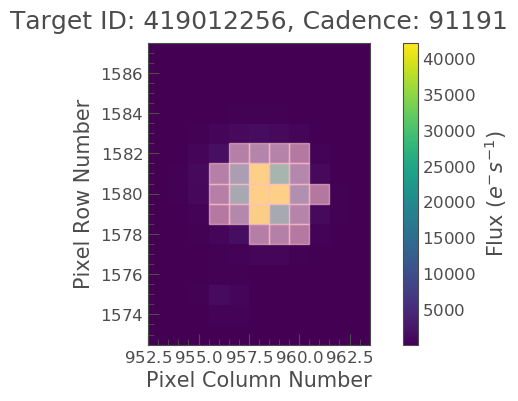

In [142]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

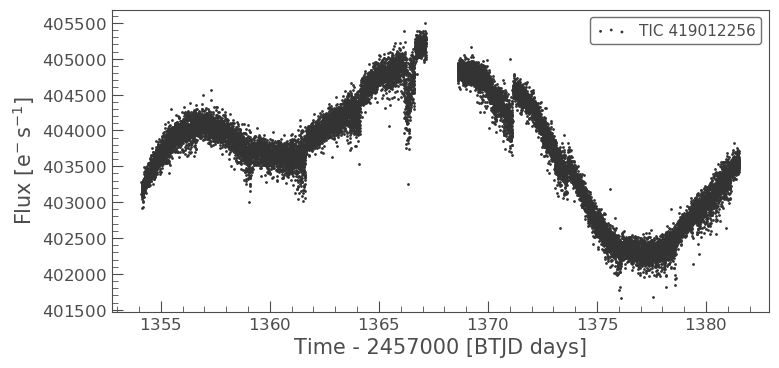

In [143]:
lc = tpf.to_lightcurve()
lc.scatter();

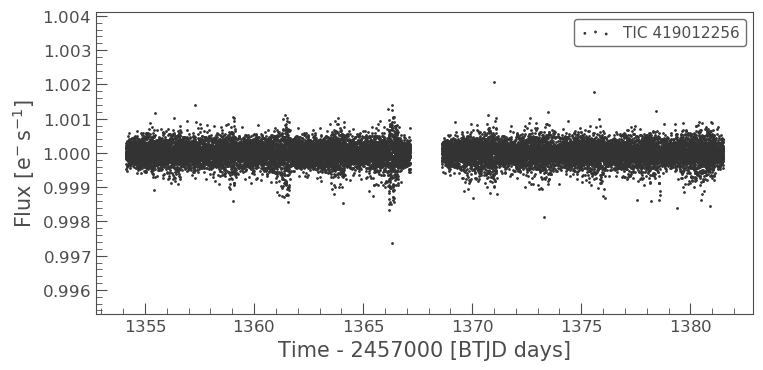

In [150]:
flat_lc = lc.flatten()
flat_lc.scatter(s=1);

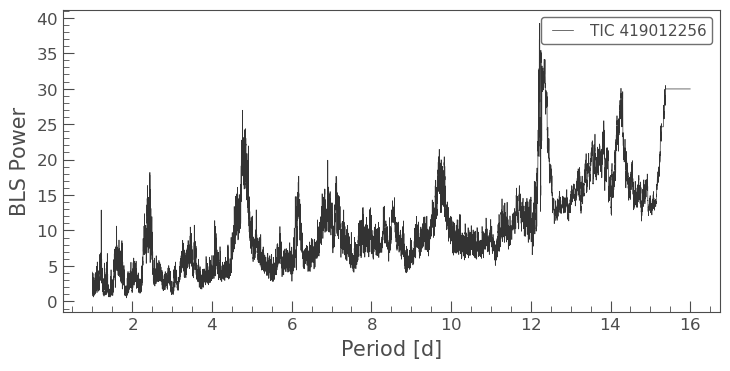

In [158]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 16, 0.001))
periodogram.plot();

In [159]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 12.223 d


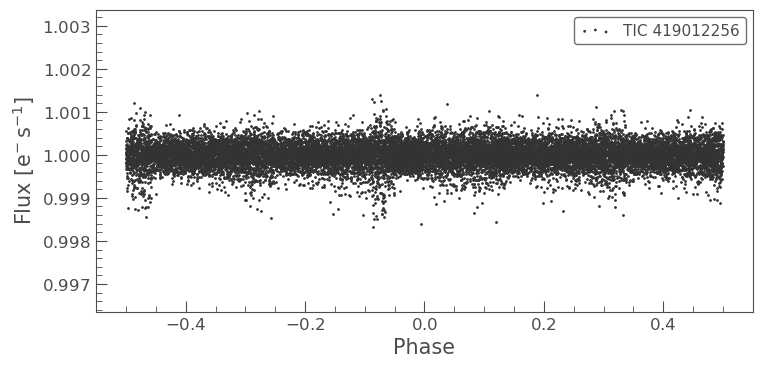

In [162]:
folded_lc = clipped_lc.fold(period=12.223, t0=1355)
folded_lc.scatter(s=1);

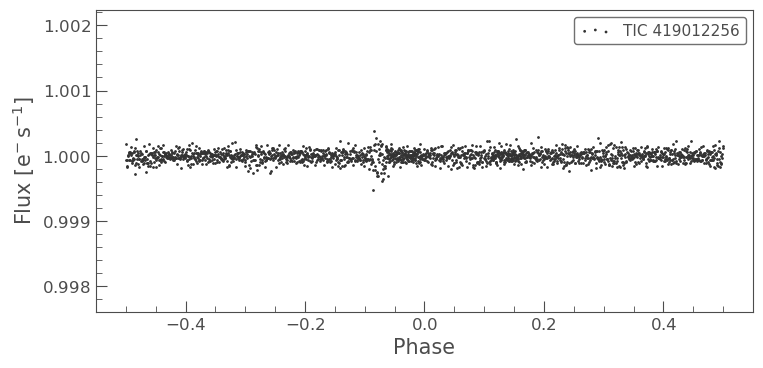

In [165]:
binned_lc = folded_lc.bin(binsize=10) 
binned_lc.scatter();